In [1]:
import numpy as np 
import torch

# floody 
from floody import data as D

In [2]:
# causalflow 
from causalflow import support as Support

In [3]:
import corner as DFM
# --- plotting ---
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

In [4]:
cuda = torch.cuda.is_available()
device = ("cuda:0" if cuda else "cpu")

# training/testing data 

In [5]:
fema = D.FEMA()

In [6]:
# load test data
_, XY_treated = fema.prepare_train_test('treated', split=0.9, seed=42)
_, XY_control = fema.prepare_train_test('control', split=0.9, seed=42)

In [7]:
# reduce dynamic range of data
XY_treated[:,0] = np.log10(XY_treated[:,0])
XY_treated[:,3] = np.log10(XY_treated[:,3])
XY_treated[:,4] = np.log10(XY_treated[:,4])

# reduce dynamic range of data
XY_control[:,0] = np.log10(XY_control[:,0])
XY_control[:,3] = np.log10(XY_control[:,3])
XY_control[:,4] = np.log10(XY_control[:,4])

# load Support

In [17]:
Supp_treated = Support.Support()
Supp_control = Support.Support()

In [18]:
Supp_treated.load_optuna('support.treated', '/scratch/gpfs/chhahn/noah/floody/support/', verbose=True)
Supp_control.load_optuna('support.control', '/scratch/gpfs/chhahn/noah/floody/support/', verbose=True)

select best flow out of 15 flows
select best flow out of 11 flows


# sample flows

In [9]:
X_flow_treated = Supp_treated.flow_support.sample(10000).detach().numpy()
X_flow_control = Supp_control.flow_support.sample(10000).detach().numpy()

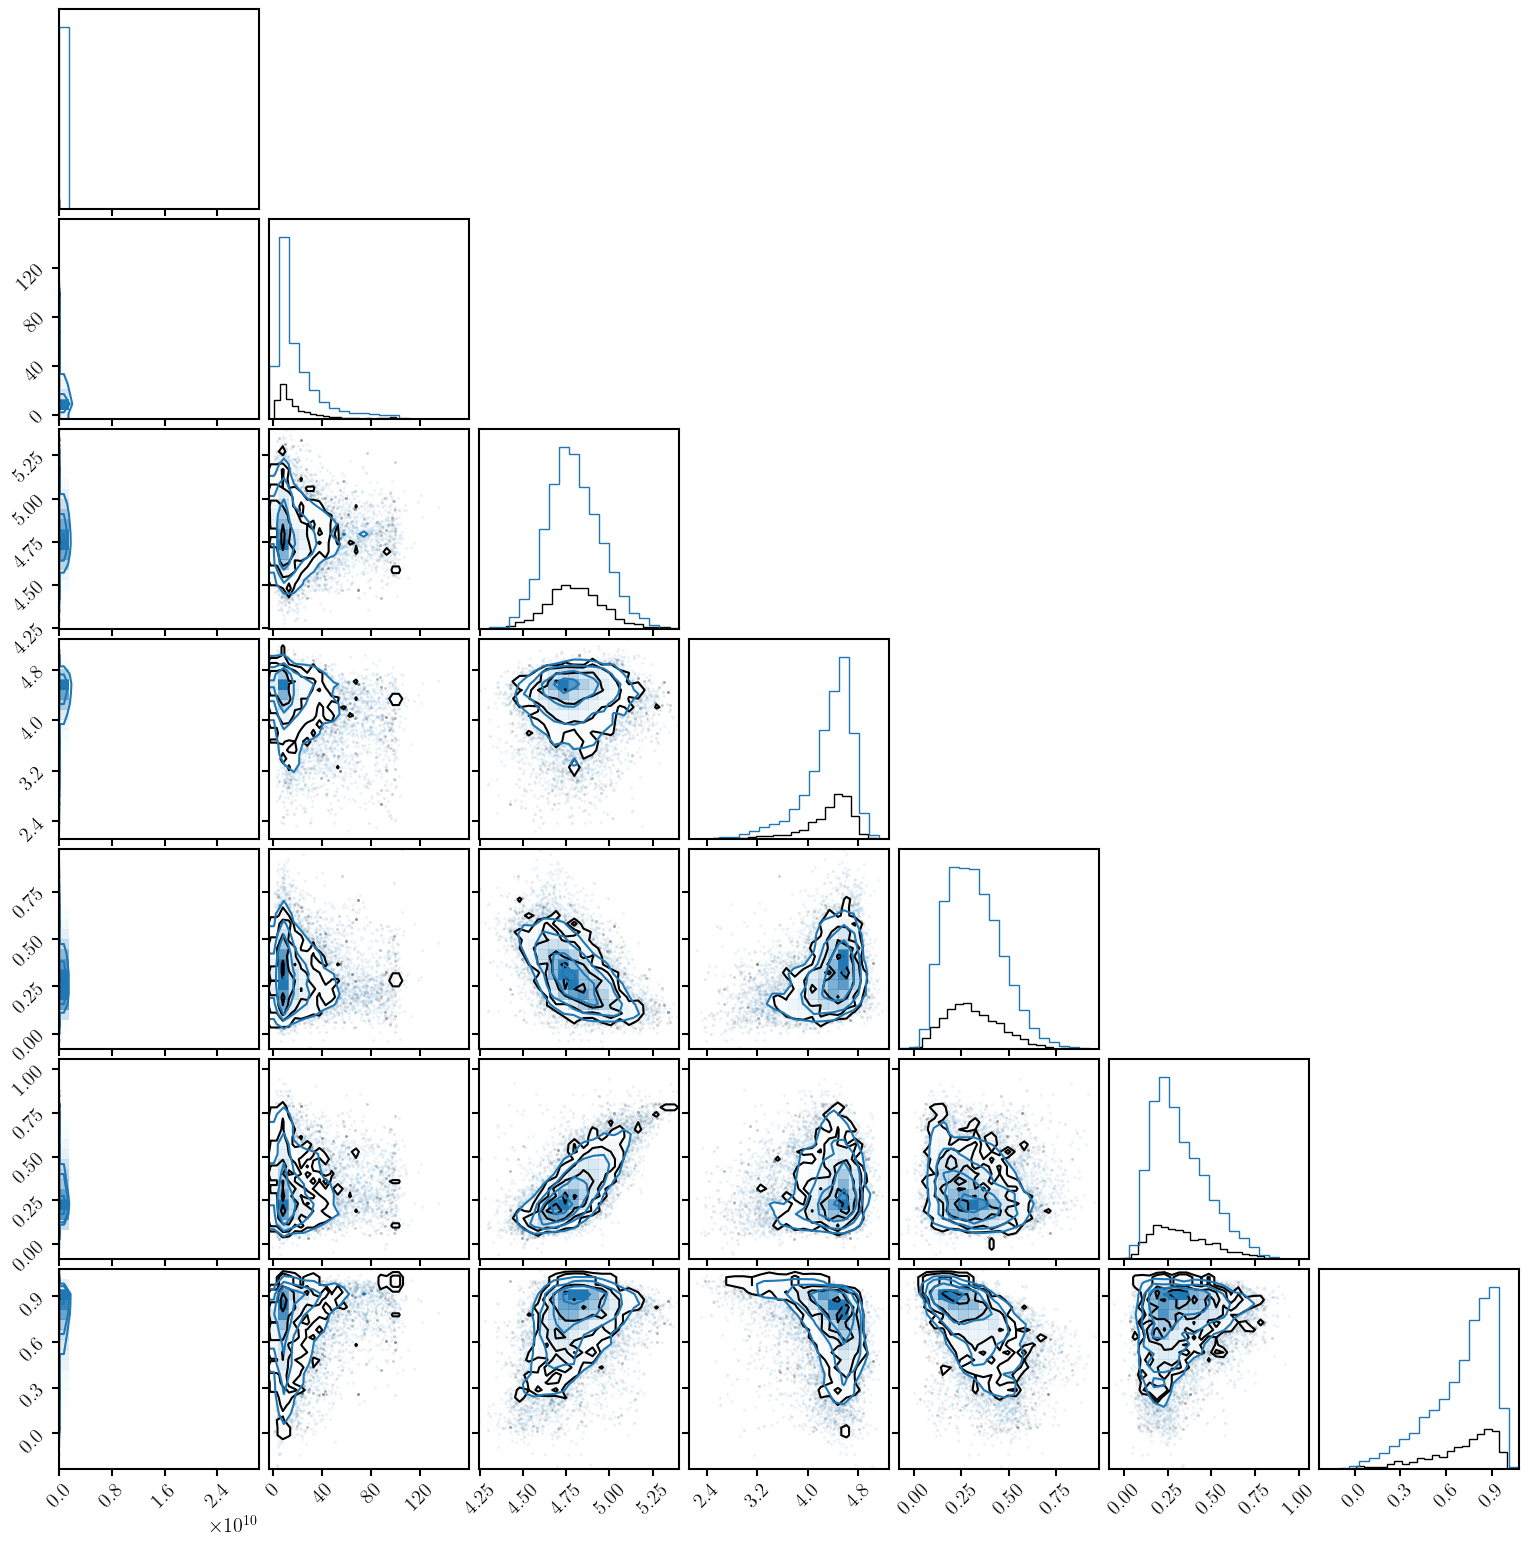

In [13]:
fig = DFM.corner(XY_treated[:,1:], color='k')
fig = DFM.corner(X_flow_treated, color='C0', fig=fig) 

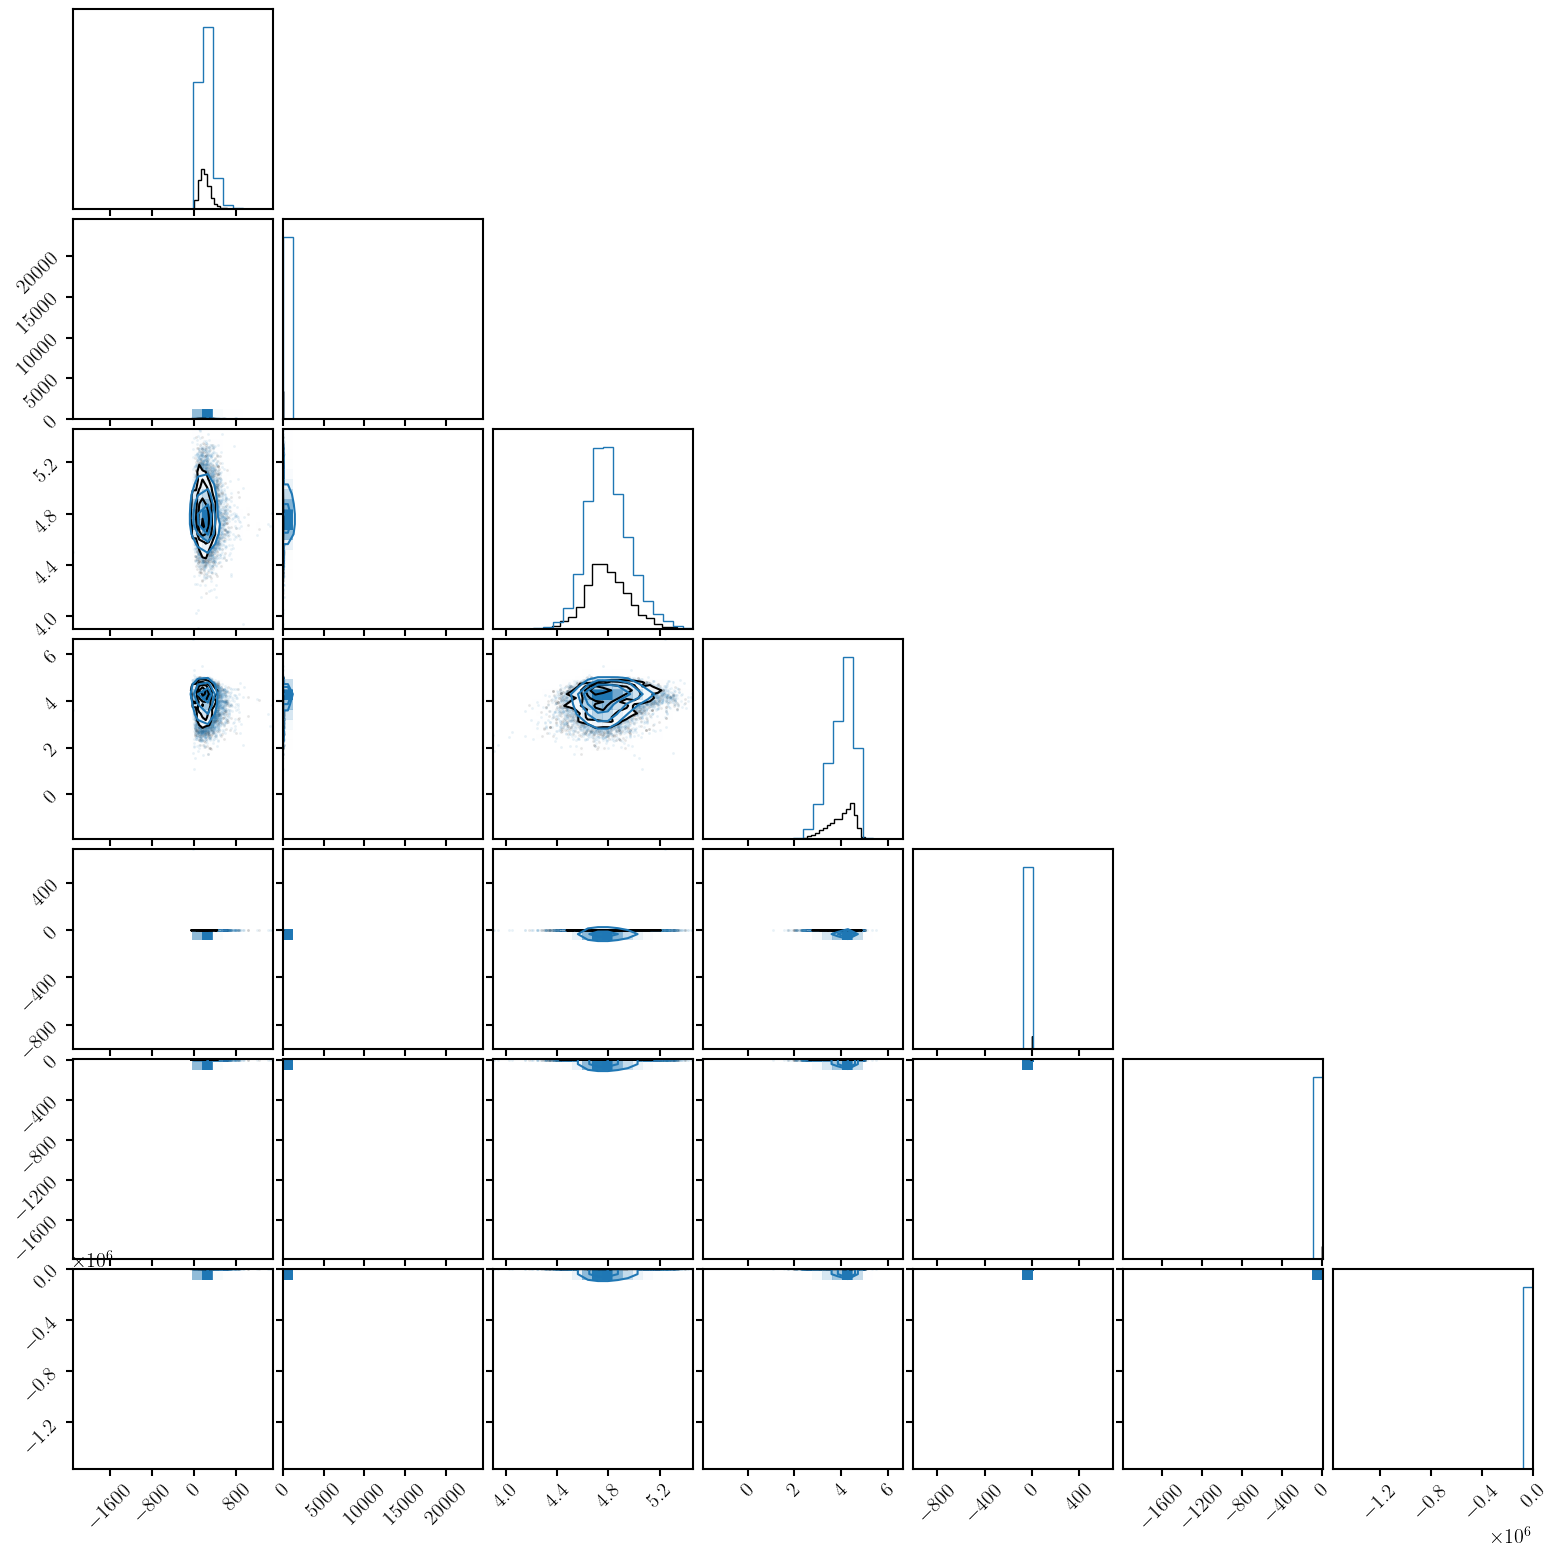

In [14]:
fig = DFM.corner(XY_control[:,1:], color='k')
fig = DFM.corner(X_flow_control, color='C0', fig=fig) 